# Geopandas and Shapefiles

by JN Hayek

Here we can focus on the use of shapefiles through the tool of Geopandas.

For this particular example we use the geological maps of Colombia.

In [1]:
from shapely.geometry import shape, mapping, LineString, Polygon, Point
from shapely.ops import split
import shapely.speedups

import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
# Create geodataframe from shapefile
def loadSHPintoGeoDataFrame(SHPfilename,**kwargs):
    gdf = gpd.read_file(SHPfilename)
    print(gdf.crs) #sanity check
    Input_CRS = kwargs.get("crs","EPSG:4326")
    gdf = gdf.to_crs(Input_CRS) #Change projection to wgs84
    return gdf

# Create a new column on a geodataframe of the index from touching neighbors to ease processing
def gdf_GetNeighborsRows(df):
    shapely.speedups.enable() # Speed up spatial queries

    df = df.assign(IDXneighbors = "")
    for index, row in df.iterrows():  
        neighbors = df[df.geometry.touches(row['geometry'])].index.tolist()
        df.at[index, "IDXneighbors"] = neighbors
    return df

# Function to get the outside boundary of a polygon using shapely
def GetPolygonExterior(RowFromGDF):
    return shape(RowFromGDF['geometry']).boundary

# Use a given dictionary to fill top and bottom ages in a new column
def df_AgeEnrichment(df,FromColTop,FromColBottom,dictTop,dictBottom,ColumnAgeTop,ColumnAgeBottom):
    df[ColumnAgeTop] = df[FromColTop].apply(lambda x: dictTop.get(x, 9999.0) )
    df[ColumnAgeBottom] = df[FromColBottom].apply(lambda x: dictBottom.get(x, 9999.0))
    return df


In [3]:
PathTemp='./../SampleData/Colombia/'
shapefilename='Colombia.shp'
GeologyPlace="Geology_Colombia"
RowAgeName="edad"
nameofScript="Colombia Hiatus Maps"

In [4]:
dict_min_age = {'Serravaliano-Tortoniano': 5, 'Cenomaniano-Maastrichtiano': 66, 'Oligoceno-Mioceno': 5, 'Turoniano-Maastrichtiano': 66, 'Jur?sico': 145, 'Berriasiano-Valanginiano': 100, 'Barremiano-Albiano': 100, 'Tortoniano-Mesiniano': 5, 'Maastrichtiano-Paleoceno': 56, 'Campaniano-Paleoceno': 56, 'Rupeliano-Langhiano': 5, 'Bartoniano-Chatiano': 23, 'Cret?cico Inferior': 100, 'Aquitaniano-Burdigaliano': 5, 'Pos-Tri?sico': 0, 'Campaniano-Maastrichtiano': 66, 'Lutetiano-Bartoniano': 34, 'Cenomaniano-Santoniano': 66, 'Valanginiano-Cenomaniano': 66, 'Barremiano-Cenomaniano': 66, 'Plioceno': 3, 'Aquitaniano?-Tortoniano?': 5, 'Valanginiano-Albiano': 100, 'Burdigaliano-Langhiano': 5, 'Valanginiano': 100, 'Albiano-Campaniano': 66, 'Eoceno-Aquitaniano': 5, 'Chatiano-Aquitaniano': 5, 'Barremiano?-Albiano': 100, 'Berriasiano': 100, 'Valanginiano-Aptiano': 100, 'Cenomaniano?-Campaniano': 66, 'Berriasiano?-Barremiano': 100, 'Oligoceno': 23, 'Rupeliano-Burdigaliano': 5, 'Langhiano-Serravaliano': 5, 'Mioceno': 5, 'Albiano-Maastrichtiano': 66, 'Jur?sico Superior': 145, 'Tri?sico?': 201, 'Mesiniano-Zancleano': 3, 'Paleoceno-Eoceno': 34, 'Cret?cico Superior': 66, 'Berriasiano-Cenomaniano': 66, 'Valanginiano-Campaniano': 66, 'Paleoceno': 56, 'Thanetiano-Ypresiano': 34, 'Bartoniano-Priaboniano': 34, 'Albiano-Cenomaniano?': 66, 'Tri?sico Superior': 201, 'Aptiano?-Maastrichtiano': 66, 'Aptiano-Cenomaniano': 66, 'Jur?sico Inferior-Jur?sico Medio': 164, 'Tri?sico': 201, 'Cenomaniano?-Campaniano?': 66, 'Albiano': 100, 'Bartoniano-Rupeliano': 34, 'Jur?sico Medio-Jur?sico Superior': 145, 'Jur?sico Inferior': 174, 'Albiano-Turoniano': 66, 'Maastrichtiano': 66, 'Langhiano-Tortoniano': 5, 'Serravaliano-Mesiniano': 5, 'Aptiano-Maastrichtiano': 66, 'Eoceno': 34, 'Albiano-Cenomaniano': 66, 'Albiano?-Cenomaniano': 66, 'Berriasiano-Aptiano': 100, 'Aptiano-Albiano': 100}
dict_max_age = {'Serravaliano-Tortoniano': 23, 'Cenomaniano-Maastrichtiano': 100, 'Oligoceno-Mioceno': 34, 'Turoniano-Maastrichtiano': 100, 'Jur?sico': 201, 'Berriasiano-Valanginiano': 145, 'Barremiano-Albiano': 145, 'Tortoniano-Mesiniano': 23, 'Maastrichtiano-Paleoceno': 100, 'Campaniano-Paleoceno': 100, 'Rupeliano-Langhiano': 34, 'Bartoniano-Chatiano': 56, 'Plioceno-Pleistoceno': 5, 'Cret?cico Inferior': 145, 'Aquitaniano-Burdigaliano': 23, 'Pos-Tri?sico': 66, 'Campaniano-Maastrichtiano': 100, 'Lutetiano-Bartoniano': 56, 'Cenomaniano-Santoniano': 100, 'Valanginiano-Cenomaniano': 145, 'Barremiano-Cenomaniano': 145, 'Plioceno': 5, 'Aquitaniano?-Tortoniano?': 23, 'Cuaternario': 3, 'Valanginiano-Albiano': 145, 'Burdigaliano-Langhiano': 23, 'Valanginiano': 145, 'Albiano-Campaniano': 145, 'Eoceno-Aquitaniano': 56, 'Chatiano-Aquitaniano': 34, 'Barremiano?-Albiano': 145, 'Berriasiano': 145, 'Valanginiano-Aptiano': 145, 'Cenomaniano?-Campaniano': 100, 'Berriasiano?-Barremiano': 145, 'Oligoceno': 34, 'Rupeliano-Burdigaliano': 34, 'Langhiano-Serravaliano': 23, 'Mioceno': 23, 'Albiano-Maastrichtiano': 145, 'Jur?sico Superior': 164, 'Mesiniano-Zancleano': 23, 'Paleoceno-Eoceno': 66, 'Cret?cico Superior': 100, 'Berriasiano-Cenomaniano': 145, 'Valanginiano-Campaniano': 145, 'Paleoceno': 66, 'Thanetiano-Ypresiano': 66, 'Bartoniano-Priaboniano': 56, 'Albiano-Cenomaniano?': 145, 'Tri?sico Superior': 237, 'Aptiano?-Maastrichtiano': 145, 'Aptiano-Cenomaniano': 145, 'Jur?sico Inferior-Jur?sico Medio': 201, 'Cenomaniano?-Campaniano?': 100, 'Albiano': 145, 'Bartoniano-Rupeliano': 34, 'Jur?sico Medio-Jur?sico Superior': 174, 'Jur?sico Inferior': 201, 'Albiano-Turoniano': 145, 'Pleistoceno': 3, 'Maastrichtiano': 100, 'Langhiano-Tortoniano': 23, 'Serravaliano-Mesiniano': 23, 'Aptiano-Maastrichtiano': 145, 'Eoceno': 56, 'Albiano-Cenomaniano': 145, 'Albiano?-Cenomaniano': 145, 'Berriasiano-Aptiano': 145, 'Aptiano-Albiano': 145}

In [5]:
MapGDF = loadSHPintoGeoDataFrame(PathTemp+shapefilename) #load of shp map + reprojection to wgs84

#Check if more than one column name. If 2 columns is the case, then first name is bottom, second is top
if (isinstance(RowAgeName, tuple)):
    MapGDF = df_AgeEnrichment(MapGDF, RowAgeName[0], RowAgeName[1], dict_min_age, dict_max_age, "ChronoAgeTop", "ChronoAgeBottom")
elif (isinstance(RowAgeName, str)):
    MapGDF = df_AgeEnrichment(MapGDF, RowAgeName, RowAgeName, dict_min_age, dict_max_age, "ChronoAgeTop", "ChronoAgeBottom")

epsg:4326


In [6]:
MapGDF = gdf_GetNeighborsRows(MapGDF) #get a new column for neighboring locations' index

In [7]:
indx = 5558
row = MapGDF.iloc[indx]
df2 = MapGDF.iloc[row["IDXneighbors"]]

<AxesSubplot:>

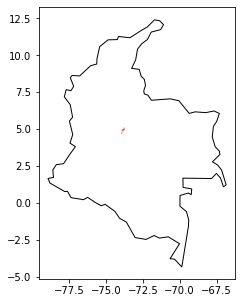

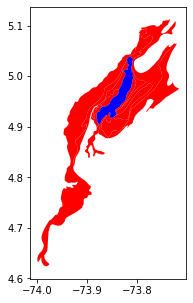

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Colombia'].plot( figsize=(5, 5),
    color='white', edgecolor='black')
df2.plot(ax=ax, color='red')

MapGDF.loc[[indx],'geometry'].plot(ax=ax, color='blue')

ax2 = df2.plot( figsize=(5, 5),
    color='red')
MapGDF.loc[[indx],'geometry'].plot(ax=ax2, color='blue')

In [12]:
MapGDF.loc[[indx]]

,simbolo_uc,ugintegrad,shape_area,objectid,n_carta_co,descripcio,comentario,edad,shape_leng,geometry,ChronoAgeTop,ChronoAgeBottom,IDXneighbors
5558,Q-al,None,0.002546,14707.0,None,Dep?sitos aluviales y de llanuras aluviales,None,Cuaternario,0.38567,"POLYGON ((-73.81203 5.01470, -73.81149 5.01291...",9999.0,3.0,"[5213, 5219, 5247, 5513, 5555, 5556, 5566, 557..."


## Data enrichment of a set of points

In [33]:
MyPoints = pd.DataFrame(
    {'Pin': ['A', 'B', 'C', 'D', 'E'],
     'Latitude': [4.95, 4.95, 4.95, 4.95, 4.95],
     'Longitude': [-73.9, -73.88, -73.86, -73.84, -73.82]})

gdf = gpd.GeoDataFrame(
    MyPoints, geometry=gpd.points_from_xy(MyPoints.Longitude, MyPoints.Latitude), 
    crs="EPSG:4326")

,Pin,Latitude,Longitude,geometry
0,A,4.95,-73.90,POINT (-73.90000 4.95000)
1,B,4.95,-73.88,POINT (-73.88000 4.95000)
2,C,4.95,-73.86,POINT (-73.86000 4.95000)
3,D,4.95,-73.84,POINT (-73.84000 4.95000)
4,E,4.95,-73.82,POINT (-73.82000 4.95000)


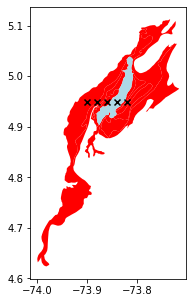

In [34]:
ax3 = df2.plot(color='red', figsize=(5, 5))
MapGDF.loc[[indx],'geometry'].plot(ax=ax3, color='lightblue')
gdf.plot(ax=ax3,marker="x",color="black")
gdf

In [36]:
gpd.sjoin(MapGDF,gdf,how="right")[["Pin","Latitude","Longitude","simbolo_uc","ChronoAgeTop","ChronoAgeBottom"]]

,Pin,Latitude,Longitude,simbolo_uc,ChronoAgeTop,ChronoAgeBottom
0,A,4.95,-73.90,k1k6-Stm,66.0,100.0
1,B,4.95,-73.88,k1k6-Stm,66.0,100.0
2,C,4.95,-73.86,N2Q1-Sc,9999.0,5.0
3,D,4.95,-73.84,Q-al,9999.0,3.0
4,E,4.95,-73.82,k6E1-Stm,56.0,100.0


## Find unique tops

In [10]:
ColumnAgeTop = "ChronoAgeTop"; ColumnAgeBottom = "ChronoAgeBottom"

BottomAgesList = MapGDF[ColumnAgeBottom].unique().tolist()
BottomAgesList = [x for x in BottomAgesList if x != 9999.0]

UnderlyingUnits = MapGDF[MapGDF.ChronoAgeTop.isin(BottomAgesList)]

tmp_list = []
for index, Row in UnderlyingUnits.iterrows():
    tmp_list.append({
        'Age': Row[ColumnAgeTop],
        'Value': -200.0,
        'geometry' : GetPolygonExterior(Row),
         })
    
ConfLinesDF = pd.DataFrame(tmp_list)
ConfLinesGDF = gpd.GeoDataFrame(ConfLinesDF, crs="EPSG:4326", geometry = ConfLinesDF.geometry)

<AxesSubplot:>

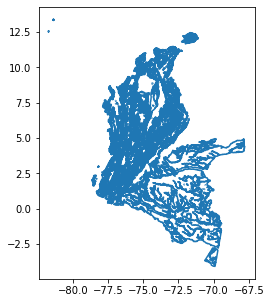

In [37]:
ConfLinesGDF.plot(figsize=(5, 5))